**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.metrics
import collections
from scipy import stats
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.x_train = np.array(X).astype(float)
        self.y_train = np.array(y).astype('int32')
        self.classes_amount = np.unique(y).shape[0]
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train, leaf_size=30)

    def _KNN(self, x_train):
        if self.algorithm == 'brute':
            distance_matrix = (x_train ** 2).sum(axis=1)[:, None] -\
                2 * x_train.dot(self.x_train.T) +\
                (self.x_train.T ** 2).sum(axis=0)
            return np.argsort(distance_matrix, axis=1)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            _, location = self.tree.query(x_train, k=self.n_neighbors)
            return location

    def _get_predictions(self, X):
        return self.y_train[self._KNN(X)]

    def predict(self, X):
        return stats.mode(self._get_predictions(X), axis=1)[0].ravel()

    def predict_proba(self, X):
        predicted = self._get_predictions(X)
        res_matrix = np.zeros((X.shape[0], self.classes_amount), dtype=float)
        i = 0
        for prob_str in predicted:
            c = collections.Counter(prob_str)
            res_matrix[i] = [float(c[j]) for j in
                             range(self.classes_amount)]
            i += 1
        return res_matrix/self.n_neighbors

    def score(self, X, y):
        return np.average(y == self.predict(X))

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 1.03 ms


In [8]:
%time clf.predict(X_test)

Wall time: 10.2 ms


array([2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0])

In [9]:
%time my_clf.predict(X_test)

Wall time: 1.61 ms


array([2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0])

In [10]:
%time clf.predict_proba(X_test)

Wall time: 233 µs


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 1.86 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [14]:
res_list = []
loops_amount = 100
MAX_NEIGHBORS = 50
for i in range(1, MAX_NEIGHBORS):
    q = []
    for j in range(loops_amount):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                            iris.target, 
                                                            test_size=0.1, 
                                                            stratify=iris.target)
        clf = MyKNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train, y_train)
        q.append(clf.score(X_test, y_test))
    res_list.append(np.mean(q))

In [15]:
res_list = np.array(res_list)
IRIS_NEIGHBORS = res_list.argmax()+1
IRIS_NEIGHBORS

14

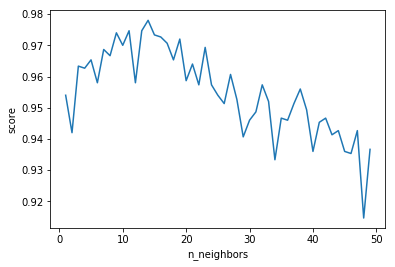

In [16]:
plt.plot(range(1, MAX_NEIGHBORS), res_list)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.show()

**MNIST**

In [17]:
mnist = fetch_mldata('MNIST original')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [19]:
clf = KNeighborsClassifier(n_neighbors=IRIS_NEIGHBORS, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=IRIS_NEIGHBORS)

In [20]:
%time clf.fit(X_train, y_train)

Wall time: 26.7 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

Wall time: 477 ms


In [22]:
%time clf.predict(X_test)

Wall time: 3.23 s


array([0., 9., 9., 6., 2., 7., 7., 0., 5., 0., 1., 5., 6., 1., 9., 1., 5.,
       0., 1., 2., 4., 7., 4., 1., 8., 7., 3., 5., 4., 0., 3., 5., 8., 5.,
       3., 3., 6., 5., 5., 2., 2., 7., 2., 5., 8., 0., 0., 3., 6., 2., 4.,
       8., 7., 8., 2., 9., 9., 7., 5., 7., 8., 4., 4., 8., 3., 6., 1., 3.,
       6., 6., 1., 3., 5., 3., 7., 5., 4., 0., 0., 7., 2., 6., 6., 9., 1.,
       3., 4., 0., 7., 1., 8., 0., 4., 7., 5., 2., 9., 6., 2., 6., 5., 5.,
       1., 1., 4., 2., 8., 7., 3., 1., 5., 9., 1., 1., 5., 7., 3., 0., 4.,
       7., 4., 6., 8., 0., 1., 7., 1., 5., 2., 6., 7., 4., 6., 0., 8., 4.,
       4., 3., 1., 0., 2., 4., 7., 8., 7., 2., 3., 7., 2., 2., 5., 1., 2.,
       6., 2., 1., 1., 0., 8., 7., 2., 6., 6., 9., 7., 9., 1., 4., 1., 1.,
       8., 1., 4., 2., 1., 2., 3., 5., 3., 3., 8., 6., 1., 9., 1., 5., 4.,
       9., 7., 9., 0., 1., 3., 8., 3., 2., 8., 6., 6., 4., 1., 0., 9., 6.,
       4., 4., 7., 5., 1., 5., 0., 5., 1., 9., 2., 2., 1., 1., 7., 8., 9.,
       7., 4., 6., 8., 3.

In [23]:
%time my_clf.predict(X_test)

Wall time: 11.5 s


array([0, 9, 9, 6, 2, 7, 7, 0, 5, 0, 1, 5, 6, 1, 9, 1, 5, 0, 1, 2, 4, 7,
       4, 1, 8, 7, 3, 5, 4, 0, 3, 5, 8, 5, 3, 3, 6, 5, 5, 2, 2, 7, 2, 5,
       8, 0, 0, 3, 6, 2, 4, 8, 7, 8, 2, 9, 9, 7, 5, 7, 8, 4, 4, 8, 3, 6,
       1, 3, 6, 6, 1, 3, 5, 3, 7, 5, 4, 0, 0, 7, 2, 6, 6, 9, 1, 3, 4, 0,
       7, 1, 8, 0, 4, 7, 5, 2, 9, 6, 2, 6, 5, 5, 1, 1, 4, 2, 8, 7, 3, 1,
       5, 9, 1, 1, 5, 7, 3, 0, 4, 7, 4, 6, 8, 0, 1, 7, 1, 5, 2, 6, 7, 4,
       6, 0, 8, 4, 4, 3, 1, 0, 2, 4, 7, 8, 7, 2, 3, 7, 2, 2, 5, 1, 2, 6,
       2, 1, 1, 0, 8, 7, 2, 6, 6, 9, 7, 9, 1, 4, 1, 1, 8, 1, 4, 2, 1, 2,
       3, 5, 3, 3, 8, 6, 1, 9, 1, 5, 4, 9, 7, 9, 0, 1, 3, 8, 3, 2, 8, 6,
       6, 4, 1, 0, 9, 6, 4, 4, 7, 5, 1, 5, 0, 5, 1, 9, 2, 2, 1, 1, 7, 8,
       9, 7, 4, 6, 8, 3, 5, 5, 8, 5, 6, 3, 0, 1, 2, 6, 2, 4, 5, 0, 2, 5,
       1, 0, 3, 8, 0, 5, 8, 6, 4, 8, 1, 5, 6, 7, 2, 2, 3, 9, 3, 7, 1, 1,
       1, 0, 9, 5, 4, 3, 7, 9, 3, 9, 9, 3, 1, 7, 1, 8, 6, 0, 4, 4, 0, 6,
       1, 0, 6, 7, 0, 8, 1, 7, 4, 9, 4, 8, 4, 1, 0,

In [24]:
%time clf.predict_proba(X_test)

Wall time: 3.36 s


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.07142857,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [25]:
%time my_clf.predict_proba(X_test)

Wall time: 11.5 s


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.07142857,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
clf.score(X_test, y_test)

0.9585714285714285

In [27]:
my_clf.score(X_test, y_test)

0.9585714285714285

Задание 4

In [28]:
clf = KNeighborsClassifier(n_neighbors=IRIS_NEIGHBORS, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=IRIS_NEIGHBORS, algorithm='kd_tree')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [30]:
%time clf.fit(X_train, y_train)

Wall time: 43.7 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

Wall time: 44.4 s


In [32]:
%time clf.predict(X_test)

Wall time: 2min 24s


array([0., 3., 5., 1., 6., 2., 7., 6., 9., 9., 2., 0., 6., 2., 2., 2., 7.,
       3., 9., 6., 7., 1., 9., 7., 0., 4., 1., 6., 5., 3., 9., 3., 3., 6.,
       2., 0., 6., 1., 1., 0., 0., 8., 9., 4., 4., 6., 4., 5., 1., 3., 3.,
       9., 4., 7., 2., 0., 1., 2., 2., 2., 8., 8., 0., 3., 2., 2., 1., 3.,
       3., 0., 0., 1., 8., 3., 5., 4., 6., 9., 0., 2., 5., 7., 2., 0., 2.,
       6., 1., 0., 6., 9., 1., 7., 1., 9., 6., 3., 7., 8., 7., 7., 1., 5.,
       9., 2., 5., 3., 6., 8., 9., 1., 1., 0., 6., 7., 9., 2., 4., 7., 3.,
       3., 8., 1., 7., 1., 7., 9., 6., 9., 5., 1., 1., 5., 4., 7., 9., 0.,
       2., 5., 8., 5., 1., 1., 6., 9., 9., 1., 2., 8., 1., 0., 6., 9., 5.,
       7., 8., 1., 4., 7., 8., 2., 5., 4., 6., 4., 3., 6., 3., 3., 7., 5.,
       0., 6., 8., 0., 4., 3., 8., 9., 4., 8., 7., 8., 5., 6., 0., 3., 9.,
       3., 0., 3., 7., 7., 4., 5., 0., 6., 6., 6., 7., 2., 0., 9., 1., 8.,
       5., 9., 7., 4., 1., 3., 2., 2., 1., 9., 1., 6., 5., 8., 1., 7., 3.,
       6., 8., 0., 2., 3.

In [33]:
%time my_clf.predict(X_test)

Wall time: 2min 24s


array([0, 3, 5, 1, 6, 2, 7, 6, 9, 9, 2, 0, 6, 2, 2, 2, 7, 3, 9, 6, 7, 1,
       9, 7, 0, 4, 1, 6, 5, 3, 9, 3, 3, 6, 2, 0, 6, 1, 1, 0, 0, 8, 9, 4,
       4, 6, 4, 5, 1, 3, 3, 9, 4, 7, 2, 0, 1, 2, 2, 2, 8, 8, 0, 3, 2, 2,
       1, 3, 3, 0, 0, 1, 8, 3, 5, 4, 6, 9, 0, 2, 5, 7, 2, 0, 2, 6, 1, 0,
       6, 9, 1, 7, 1, 9, 6, 3, 7, 8, 7, 7, 1, 5, 9, 2, 5, 3, 6, 8, 9, 1,
       1, 0, 6, 7, 9, 2, 4, 7, 3, 3, 8, 1, 7, 1, 7, 9, 6, 9, 5, 1, 1, 5,
       4, 7, 9, 0, 2, 5, 8, 5, 1, 1, 6, 9, 9, 1, 2, 8, 1, 0, 6, 9, 5, 7,
       8, 1, 4, 7, 8, 2, 5, 4, 6, 4, 3, 6, 3, 3, 7, 5, 0, 6, 8, 0, 4, 3,
       8, 9, 4, 8, 7, 8, 5, 6, 0, 3, 9, 3, 0, 3, 7, 7, 4, 5, 0, 6, 6, 6,
       7, 2, 0, 9, 1, 8, 5, 9, 7, 4, 1, 3, 2, 2, 1, 9, 1, 6, 5, 8, 1, 7,
       3, 6, 8, 0, 2, 3, 7, 8, 8, 8, 7, 0, 5, 1, 5, 3, 2, 7, 5, 1, 0, 5,
       0, 1, 3, 5, 0, 2, 1, 0, 7, 8, 7, 7, 9, 8, 4, 6, 1, 0, 2, 4, 7, 5,
       1, 6, 3, 1, 1, 0, 2, 0, 4, 4, 5, 6, 9, 2, 2, 5, 7, 4, 6, 5, 4, 6,
       2, 3, 6, 3, 7, 2, 3, 4, 5, 3, 2, 9, 6, 3, 0,

In [34]:
%time clf.predict_proba(X_test)

Wall time: 2min 25s


array([[0.92857143, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
%time my_clf.predict_proba(X_test)

Wall time: 2min 25s


array([[0.92857143, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
clf.score(X_test, y_test)

0.9857142857142858

In [37]:
my_clf.score(X_test, y_test)

0.9857142857142858

Задание 5

In [ ]:
# seaborn
Библиотека для визуализации данных (построения разных графиков), базируется на matplotlib
# matplotlib
Библиотека для визуаизации данных двумерной(трёхмерной) графикой
# train_test_split
Функция для разделения обучающих данных на две части: обучающую выборку и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
Инструмент (?) для последовательного преобразования данных. Работает аналогично конвейеру bash'a
# StandardScaler (from sklearn.preprocessing import StandardScaler)
Класс, предназначенный для нормировки данных
# ClassifierMixin
Класс, родительский для всех классификаторов из sklearn
# NeighborsBase
Класс, родительский для всех классов neighbors-предсказателей из sklearn
# KNeighborsMixin
Класс, родительский для всех классов, включающих метод поиска ближайших соседей
# SupervisedIntegerMixin
Базовый класс для классификаторов, необходимый для реализации метода fit()